In [1]:
import numpy as np
import matplotlib.pyplot as plt

A quantum support vector machine (QSVM) is a variant of the classical support vector machine (SVM) algorithm that uses quantum computing resources to perform the training and prediction tasks.

Like the classical SVM algorithm, the QSVM algorithm is a supervised learning algorithm that can be used for classification and regression tasks. The goal of the QSVM algorithm is to find the best linear decision boundary that separates the different classes in the data, in such a way that the margin between the decision boundary and the closest examples from each class is maximized.

The main difference between the classical SVM algorithm and the QSVM algorithm is the way the decision boundary is found. In the classical SVM algorithm, the decision boundary is found by solving a convex optimization problem using linear algebra operations. In the QSVM algorithm, the decision boundary is found by mapping the input vectors to a higher-dimensional space using a quantum circuit, and then solving the optimization problem in this higher-dimensional space.

The QSVM algorithm is useful in situations where the classical SVM algorithm is not able to find a good decision boundary due to the limitations of classical computing resources. By using quantum computing resources, the QSVM algorithm can find a decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.

## Quantum Feature Maps

We implement Quantum Feature Maps with variational quantum circuits $\mathcal{E}(\vec{x})$:

$$
\mathcal{E} : \mathbb{R}^n \rightarrow \mathcal{V}
$$

$$ 
\vec{x} \mapsto \ket{\psi(\vec{x})}
$$

<center>
<img src="./img/feature_map.png" width="150" height="200">
<center>

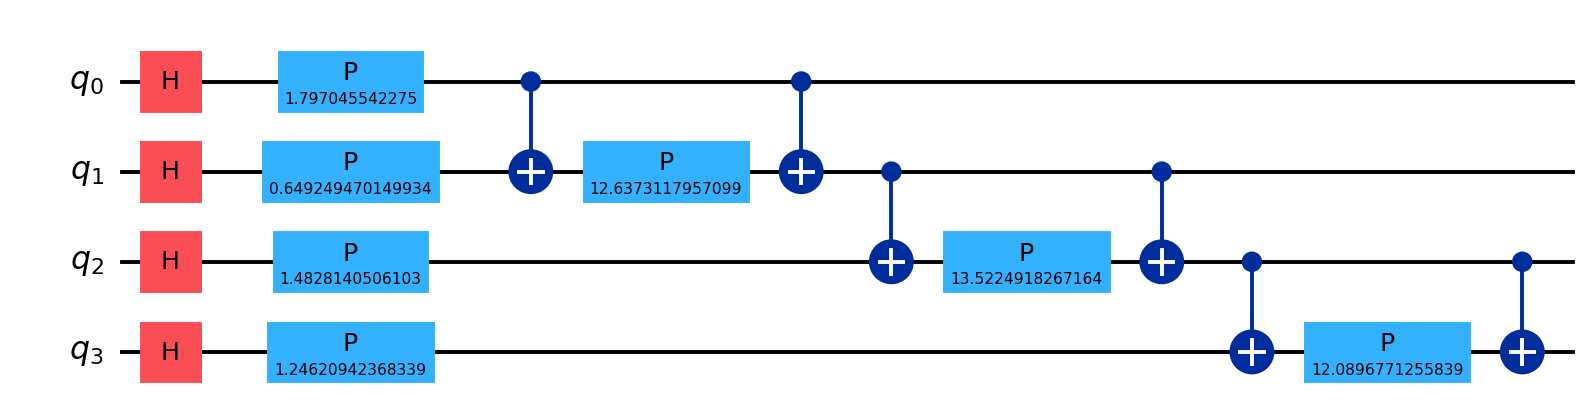

In [2]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)
data = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement="linear")
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx", scale=1.4)

It creates a random input vector `x` of size `num_qubits` (4) and creates an instance of the `ZZFeatureMap` class. The `feature_dimension` parameter is set to `num_qubits`, the `reps` parameter is set to 1, which means the circuit will be applied once to the qubits, and the `entanglement` parameter is set to `'linear'`, which means that the qubits will be fully connected.

The `assign_parameters` method is used to assign the random input vector `x` to the circuit's parameters. The `inplace=True` parameter tells the method to update the parameters in place, which means that the circuit's parameters are updated directly.

The `decompose()` method is used to decompose the circuit into a set of gates that can be executed on a real quantum computer, and the `draw()` method is used to display the circuit. The `'mpl'` parameter tells the method to display the circuit using the Matplotlib library, the `'style'` parameter is set to `'iqx'` which the same drawer style as the IBMQ Experience platform and the `'scale'` parameter is set to 1.4, which sets the size of the circuit.

This circuit is useful when we want to perform a quantum machine learning task, `ZZFeatureMap` is a circuit that can be used to map input data points to higher-dimensional space, so that it can be possible to find a linear decision boundary in higher-dimensional space. By using this circuit, we can map input data points to a higher-dimensional space, and then use quantum algorithms to classify these points.

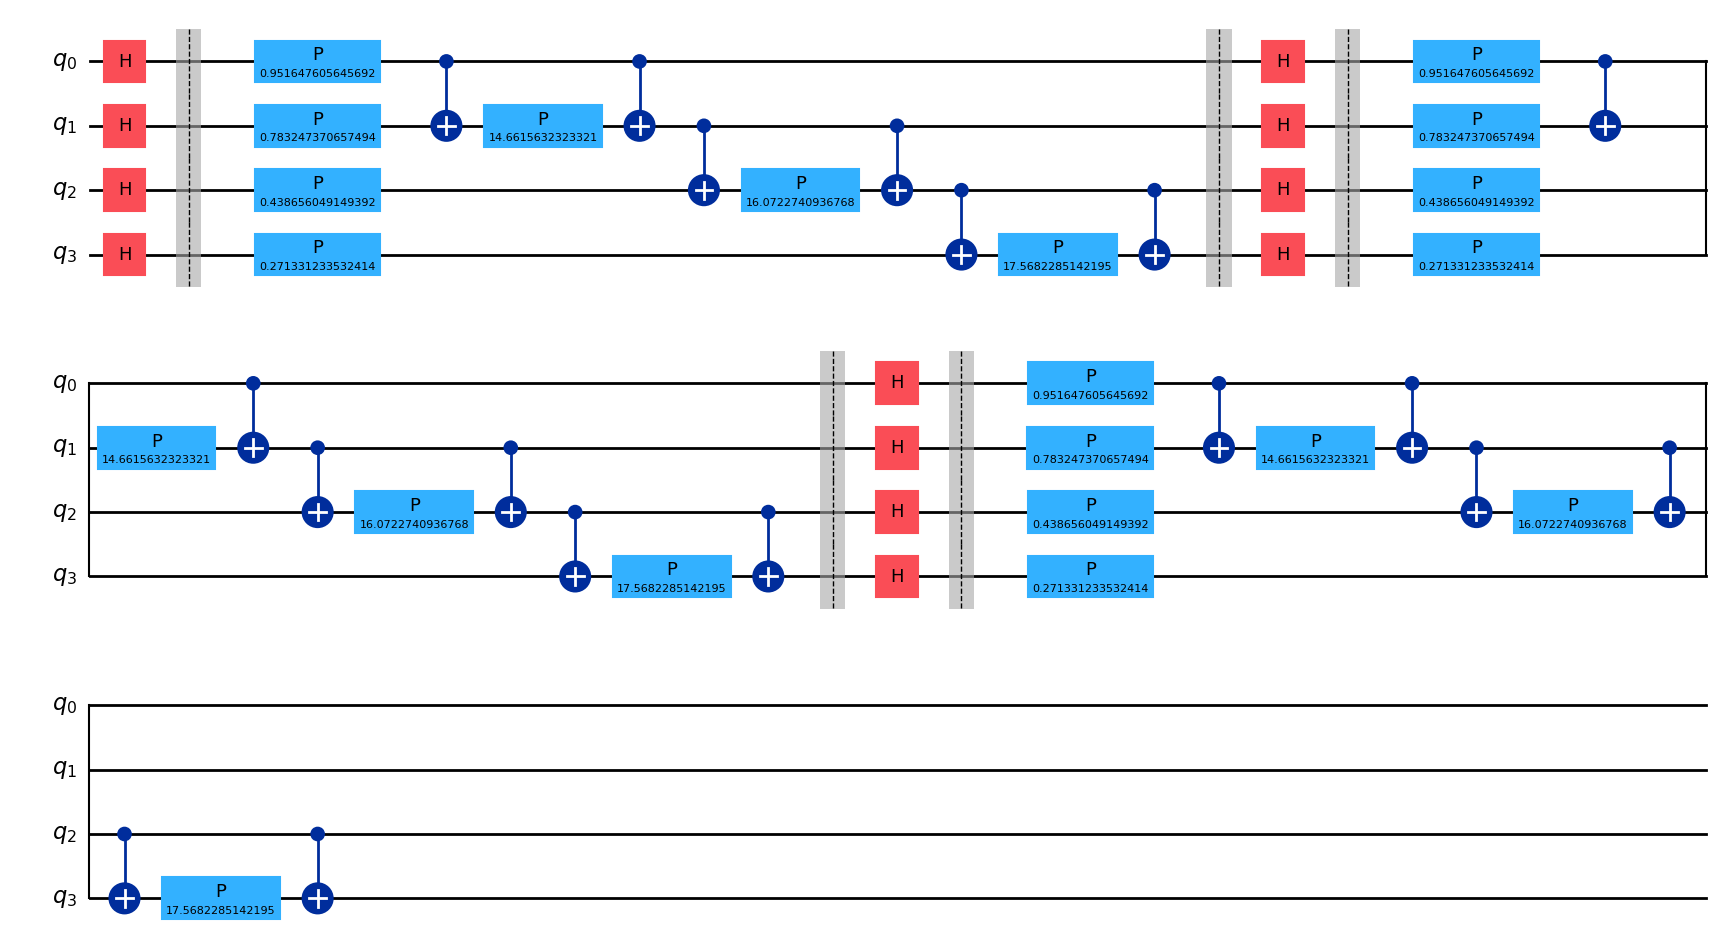

In [3]:
from qiskit.circuit.library import ZZFeatureMap

num_qubits = 4
x = np.random.random(num_qubits)
data = ZZFeatureMap(
    feature_dimension=num_qubits, reps=3, entanglement="linear", insert_barriers=True
)
data.assign_parameters(x, inplace=True)
data.decompose().draw("mpl", style="iqx")

This code snippet is similar to the previous one, but with a few differences. It also creates a quantum circuit that applies a `ZZFeatureMap` to a set of qubits, but the `reps` parameter is now set to 3, which means that the circuit will be applied 3 times to the qubits.

The `insert_barriers` parameter is set to `True`, which means that barriers will be inserted between the repetitions of the circuit. These barriers are used to ensure that the different repetitions of the circuit are executed independently of one another. This is useful when the circuit is executed on a real quantum computer, as it can help to mitigate errors that may be caused by crosstalk between different qubits.

By applying the circuit multiple times, we increase the feature dimension of the input data points. This can potentially improve the classification performance of the circuit.

## Building a quantum kernel

The quantum kernel $k \left( \vec{x} , \vec{x}' \right)$ to be evaluated as 

$$
k \left( \vec{x} , \vec{x}' \right) = \left| \left< \psi(\vec{x}') | \psi(\vec{x}) \right> \right |^2 = \left| \left<0 | \mathcal{E}^\dagger(\vec{x}')  \mathcal{E}(\vec{x}) | 0 \right> \right |^2
$$ 

<center>
<img src="./img/qkernel.png" width=300 height=300>

### Using Qiskit Only

In [4]:
from qiskit import BasicAer, transpile, QuantumCircuit

backend = BasicAer.get_backend("qasm_simulator")
shots = 1024

dimention = 2
feature_map = ZZFeatureMap(dimention, reps=1)

This code snippet is using Qiskit to create a quantum circuit that applies a `ZZFeatureMap` to a set of qubits, and then simulates the circuit using a basic quantum assembly language (QASM) simulator backend.

The `BasicAer.get_backend('qasm_simulator')` function is used to create an instance of the QASM simulator backend. This backend can be used to simulate the circuit using a classical computer.

The `'shots'` variable is set to 1024, which means that the circuit will be executed 1024 times and the results will be collected and averaged.

The dimention variable is set to 2, which means that the circuit will be applied to 2 qubits. The `feature_map` variable is an instance of the `ZZFeatureMap` class, which is set to use the 2 qubits and apply the circuit only once.

In [5]:
def evaluate_kernel(x_i, x_j):
    """
    Evaluates the dot product of two input vectors in a higher dimensional space using a quantum circuit.

    Parameters:
    -----------

    `x_i` : array-like, The first input vector of shape `(d,)`.
    `x_j` : array-like, The second input vector of shape `(d,)`.

    Returns:
    --------

    `float`: The dot product of `x_i` and `x_j` in the higher dimensional space.
    """
    circuit = QuantumCircuit(dimention)
    circuit.compose(feature_map.assign_parameters(x_i), inplace=True)
    circuit.compose(feature_map.assign_parameters(x_j).inverse(), inplace=True)
    circuit.measure_all()

    transpiled = transpile(circuit, backend)
    counts = backend.run(transpiled, shots=shots).result().get_counts()
    return counts.get("0" * dimention, 0) / shots

This code snippet defines a function `evaluate_kernel` that takes two input vectors `x_i` and `x_j` and returns the dot product of these vectors in a higher dimensional space.

The function starts by creating an instance of the `QuantumCircuit` class with dimention number of qubits. Then, it composes the `feature_map` circuit with the parameters `x_i` and `x_j`, and applies the inverse of the circuit with `x_j`. This operation is equivalent to applying the `feature_map` circuit to both `x_i` and `x_j`, and taking their dot product in the higher dimensional space.

It then measures all qubits, in order to obtain a binary string that represents the dot product of the two input vectors.

Then it uses the `transpile` function to convert the circuit into a form that can be run on the backend. It runs the circuit on the backend, by passing the transpiled circuit and the number of shots to the `run` method. It gets the results of the simulation by calling the `result()` method, and then gets the counts of all the binary strings that were obtained by measuring the qubits.

It returns the count of the binary string `'0'*dimention` divided by the number of shots. This value is an estimate of the dot product of the two input vectors in the higher dimensional space, which is known as the kernel trick.

This function can be useful when we want to compute the kernel function of two input vectors in a quantum machine learning algorithm.

In [6]:
from data_generators import circle

X, y = circle()
evaluate_kernel(X[2], X[3])

0.162109375

This code is using the `evaluate_kernel` function that you defined earlier and it's calling it with two points, `X[2]` and `X[3]` from the `circle` data set. It is using the `evaluate_kernel` function to evaluate the kernel function on these two points.

This code can be used to evaluate the kernel function on a pair of input points, which can be useful in evaluating the performance of the QSVM algorithm.

### Using Qiskit Nature

In [7]:
from qiskit_machine_learning.kernels import QuantumKernel

kernel = QuantumKernel(feature_map, quantum_instance=backend)
kernel.evaluate(X[2], X[3])

array([[0.14355469]])

This code is using the `QuantumKernel` class provided by the `qiskit_machine_learning` library to evaluate the kernel function on the two points `X[2]` and `X[3]` from the `circle` data set.

The QuantumKernel class is a wrapper around the `evaluate_kernel` function that you defined earlier. It takes the feature map circuit and `quantum_instance` as input and creates an object that can be passed as the kernel parameter of a `scikit-learn` estimator. The `evaluate` method of the `QuantumKernel` object takes two input points and applies the same steps as the `evaluate_kernel` function, but it is more convenient to use as it is integrated with the `scikit-learn` library.

The `QuantumKernel` class is a flexible kernel that can be used with a variety of quantum machine learning algorithms. It takes a quantum circuit as an input, which is used to map the input vectors to a higher dimensional space, and it returns a kernel function that can be used to compute the dot product of two input vectors in the higher dimensional space.

## Classification

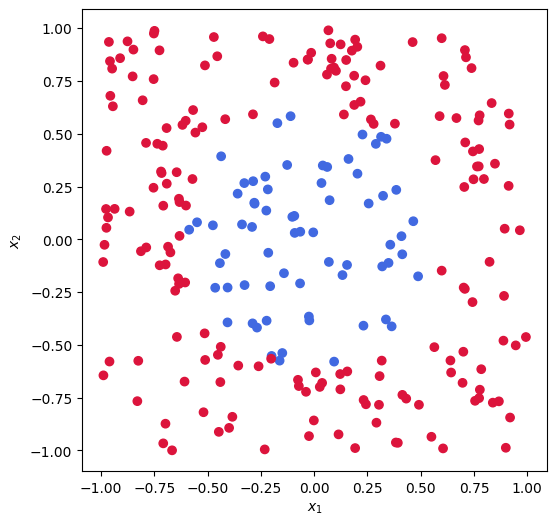

In [8]:
points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

This code snippet uses the `circle` function from `data_generators` module to generate a set of points that form a circle. The `circle` function takes one optional parameter `num_points` which defaults to 250. It creates random points between `(-1,-1)` and `(1,1)` and labels them as 1 if they are outside of radius of 0.6 and -1 if they are inside the radius of 0.6.

Then it creates an array of colors to be used when plotting the points. It uses `"crimson"` color for points with label 1 and `"royalblue"` color for points with label -1.

Next it creates a scatter plot of the points using Matplotlib library. It sets the x-axis label to `"$x_1$"` and y-axis label to `"$x_2$"`. The scatter plot is showing the points generated by the `circle` function in a scatter plot, with the points inside the circle labeled as -1 in blue color, and points outside the circle labeled as 1 in red color.

In [9]:
from sklearn.svm import SVC

qsvm = SVC(kernel=kernel.evaluate)
qsvm.fit(points, labels)
predicted = qsvm.predict(points)

This code snippet uses the `scikit-learn` library to train a support vector machine (SVM) on the points generated by the `circle` function. It first creates an instance of the `SVC` class, which is an implementation of the SVM algorithm in `scikit-learn`. The kernel parameter is set to the evaluate method of the previously defined kernel object, which is a quantum kernel implemented using the `QuantumKernel` class.

It then calls the `fit` method on the `qsvm` object, passing in the `points` and `labels` generated by the circle function. This trains the SVM model on the data.

The predict method is called on the `qsvm` object, passing in the points generated by the `circle` function. This applies the trained model to the data and returns the predicted labels for each point. The predicted labels are saved in the `predicted` variable

This code snippet is useful for training a support vector machine on a set of data using a quantum kernel. The quantum kernel can help to find a linear decision boundary in a higher-dimensional space, which can improve the performance of the SVM algorithm.

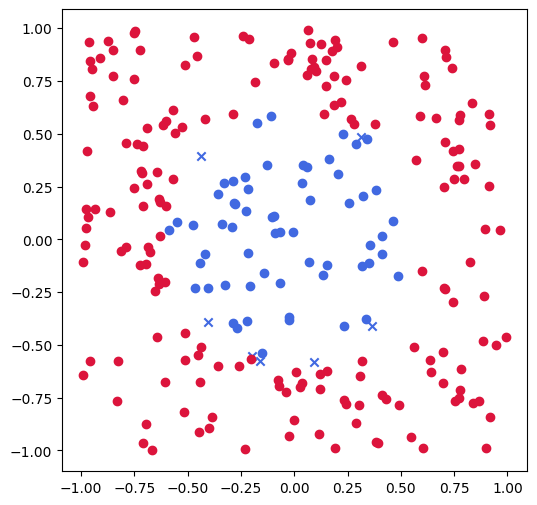

In [10]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(labels, predicted)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points, markers, colors):
    plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

The plot shows the points generated by the `circle` function in a scatter plot, with the points that were correctly classified by the SVM model labeled as `'o'` in red or blue color, and points that were misclassified by the SVM model labeled as `'x'` in red or blue color.